In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales_data.csv')

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB
None
   Produc

Missing Values:
 Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64


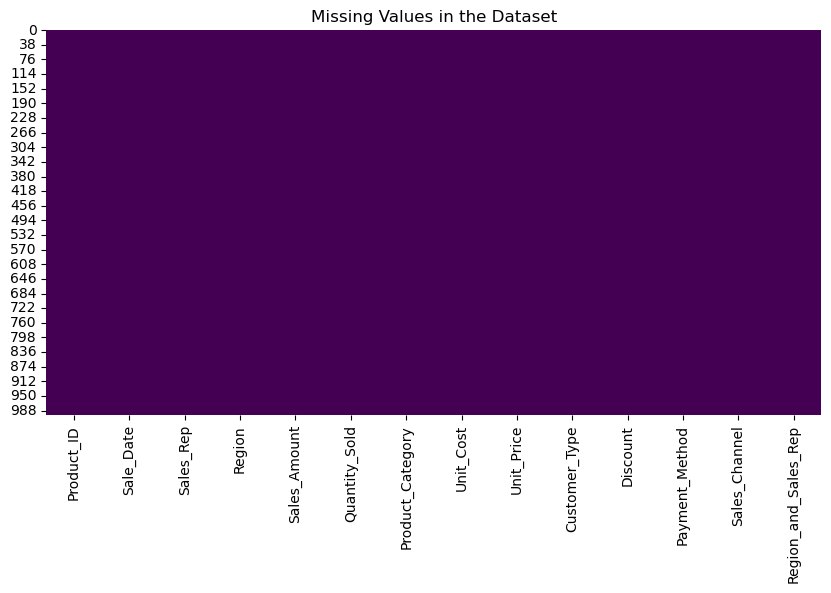

In [2]:
# Check for null values
print("Missing Values:\n", df.isnull().sum())

# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in the Dataset')
plt.show()

In [3]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [4]:
print(df.columns)

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')


In [5]:
df.rename(columns={'Sales_Amount': 'Sales'}, inplace=True)

        Product_ID        Sales  Quantity_Sold    Unit_Cost   Unit_Price  \
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000   
mean   1050.128000  5019.265230      25.355000  2475.304550  2728.440120   
std      29.573505  2846.790126      14.159006  1417.872546  1419.399839   
min    1001.000000   100.120000       1.000000    60.280000   167.120000   
25%    1024.000000  2550.297500      13.000000  1238.380000  1509.085000   
50%    1051.000000  5019.300000      25.000000  2467.235000  2696.400000   
75%    1075.000000  7507.445000      38.000000  3702.865000  3957.970000   
max    1100.000000  9989.040000      49.000000  4995.300000  5442.150000   

         Discount  
count  1000.00000  
mean      0.15239  
std       0.08720  
min       0.00000  
25%       0.08000  
50%       0.15000  
75%       0.23000  
max       0.30000  


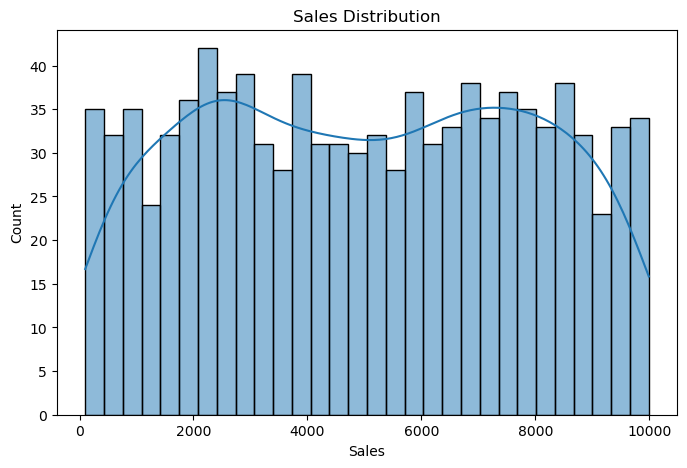

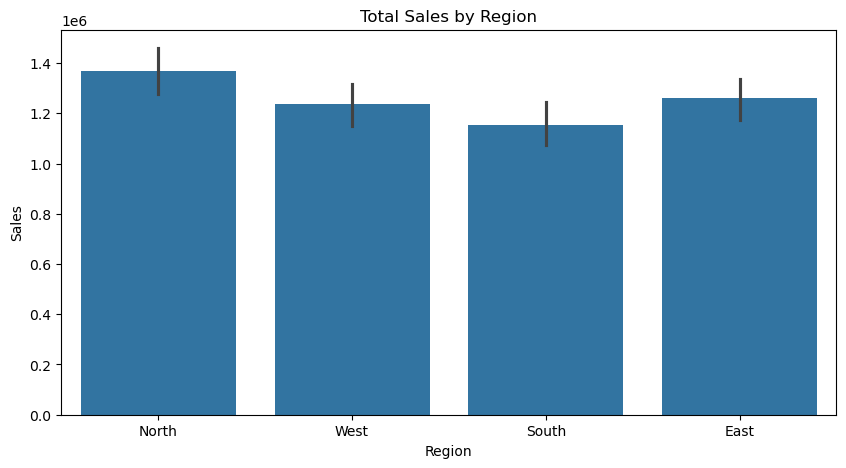

In [6]:
# Summary statistics
print(df.describe())

# Sales distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()

# Sales by region or category
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Region', y='Sales', estimator=sum)
plt.title('Total Sales by Region')
plt.show()

In [7]:
# total revenue
df['Total Revenue'] = df['Quantity_Sold'] * df['Unit_Price']

In [8]:
# Clean columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# total revenue
df['total_revenue'] = df['quantity_sold'] * df['unit_price']

# profit 
df['profit'] = (df['total_revenue'] - df['unit_cost'])

# profit margin
df['profit_margin'] = (df['profit'] / df['total_revenue']) * 100

In [9]:
df.head()

,product_id,sale_date,sales_rep,region,sales,quantity_sold,product_category,unit_cost,unit_price,customer_type,discount,payment_method,sales_channel,region_and_sales_rep,total_revenue,profit,profit_margin
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,4809.96,4657.21,96.824298
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,71560.48,67744.09,94.666903
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,11142.00,10880.44,97.652486
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,174242.25,169912.22,97.514937
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,9005.23,8367.86,92.922224


In [10]:
print(df[['total_revenue', 'profit', 'profit_margin']].describe())

       total_revenue         profit  profit_margin
count    1000.000000    1000.000000    1000.000000
mean    70329.940710   67854.636160      92.475086
std     57783.299413   56867.404886      13.071274
min       211.180000      17.360000       0.744046
25%     23363.535000   21597.950000      93.697771
50%     54519.175000   52298.490000      96.558286
75%    105855.845000  102649.552500      97.719963
max    252147.360000  247380.830000      99.653506


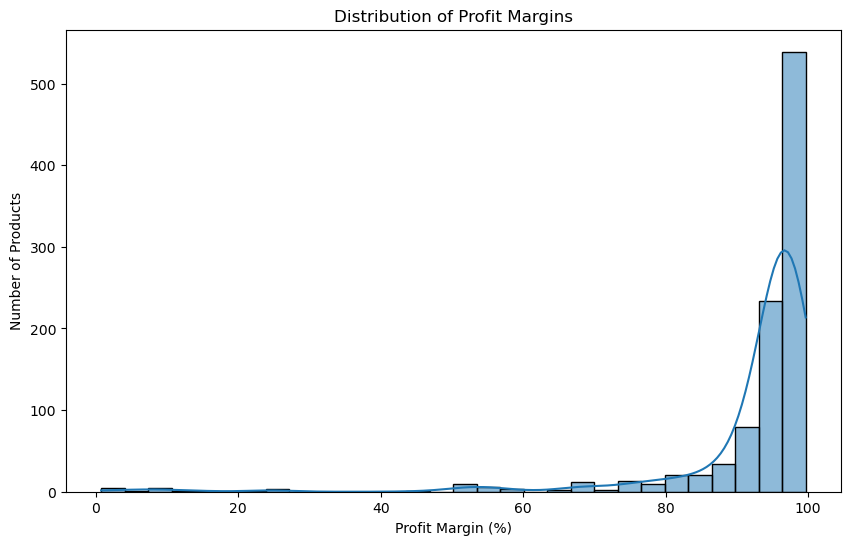

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['profit_margin'], bins=30, kde=True)
plt.title("Distribution of Profit Margins")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Number of Products")
plt.show()

In [12]:
df.to_csv('cleaned_sales_data.csv', index=False)
print("Data saved as cleaned_sales_data.csv")

Data saved as cleaned_sales_data.csv


In [13]:
# make sure sale_Date is in datetime format
df['sale_date'] = pd.to_datetime(df['sale_date'])

# create ne time-based features
df['year'] = df['sale_date'].dt.year
df['month'] = df['sale_date'].dt.month
df['month_year'] = df['sale_date'].dt.to_period('M')

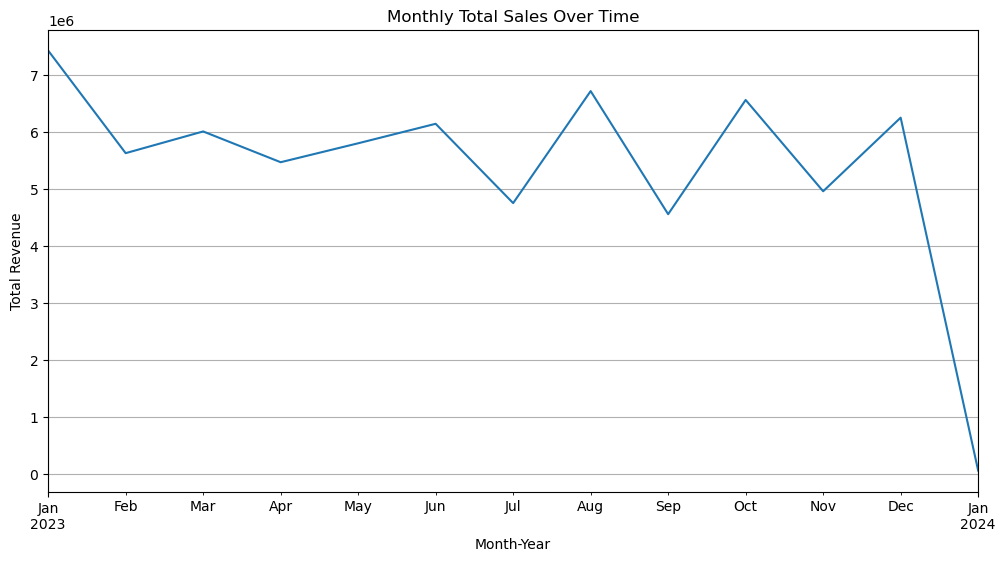

In [14]:
# monthly sales trend
monthly_sales = df.groupby('month_year')['total_revenue'].sum()

# plot the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title("Monthly Total Sales Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

In [15]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [16]:
from prophet import Prophet

# prep data
forecast_df = df.groupby('sale_date')['total_revenue'].sum().reset_index()
forecast_df = forecast_df.rename(columns={'sale_date': 'ds', 'total_revenue': 'y'})

07:45:56 - cmdstanpy - INFO - Chain [1] start processing
07:45:56 - cmdstanpy - INFO - Chain [1] done processing


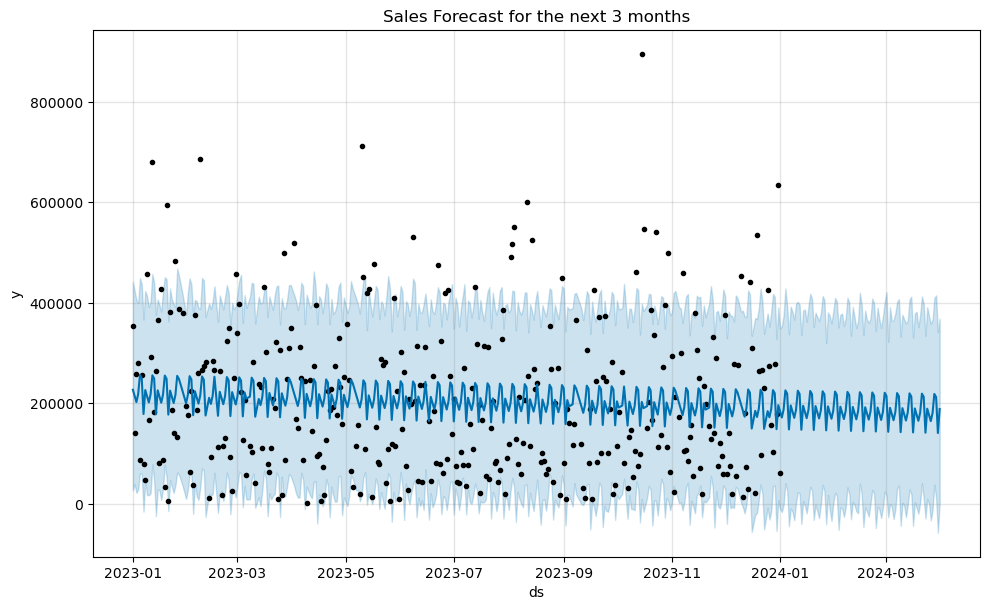

In [17]:
# Create and fit the model
model = Prophet()
model.fit(forecast_df)

# Create future dates
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# plot the forecast
fig1 = model.plot(forecast)
plt.title("Sales Forecast for the next 3 months")
plt.show()

In [18]:
# merge actual and predicted
forecast_filtered = forecast[['ds', 'yhat']].set_index('ds')
actual = forecast_df.set_index('ds')

combined = actual.join(forecast_filtered, how='inner')
combined['error'] = combined['y'] - combined['yhat']
combined['percent_error'] = (combined['error'] / combined['y']) * 100

print(combined[['y', 'yhat', 'percent_error']].tail())

                    y           yhat  percent_error
ds                                                 
2023-12-28  103961.16  226268.578855    -117.647224
2023-12-29  278788.84  219915.419205      21.117567
2023-12-30  177702.16  148504.543115      16.430648
2023-12-31  634256.03  196294.926953      69.051153
2024-01-01   60279.46  183810.464019    -204.930509


In [19]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [20]:
# sales_dashboard.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# load data
st.title("Sales Analysis Dashboard")

df = pd.read_csv("cleaned_sales_data.csv")
df['sale_date'] = pd.to_datetime(df['sale_date'])

# sidebar filter
st.sidebar.header("Filters")
regions = df['region'].unique()
selected_region = st.sidebar.selectbox("Select Region", regions)
filtered_df = df[df['region'] == selected_region]

# show raw data
if st.checkbox("Show Raw Data"):
    st.write(filtered_df.head())

# monthly sales trend
st.subheader(f"Monthly Sales Trend - {selected_region}")
monthly_sales = filtered_df.groupby(filtered_df['sale_date'].dt.to_period('M'))['total_revenue'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

st.line_chart(monthly_sales)

# forecasting
st.subheader("Sales Forecast (Next 3 months)")

# prepare data for prophet
forecast_df = filtered_df.groupby('sale_date')['total_revenue'].sum().reset_index()
forecast_df = forecast_df.rename(columns={'sale_date': 'ds', 'total_revenue': 'y'})



2025-05-21 07:46:00.727 
  command:

    streamlit run C:\Users\lynet\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-21 07:46:00.744 Session state does not function when running a script without `streamlit run`


In [21]:
forecast_df.head()

,ds,y
0,2023-01-01,343531.22
1,2023-01-04,112484.82
2,2023-01-05,43221.86
3,2023-01-07,46274.31
4,2023-01-09,387429.93


07:46:01 - cmdstanpy - INFO - Chain [1] start processing
07:46:01 - cmdstanpy - INFO - Chain [1] done processing


DeltaGenerator()

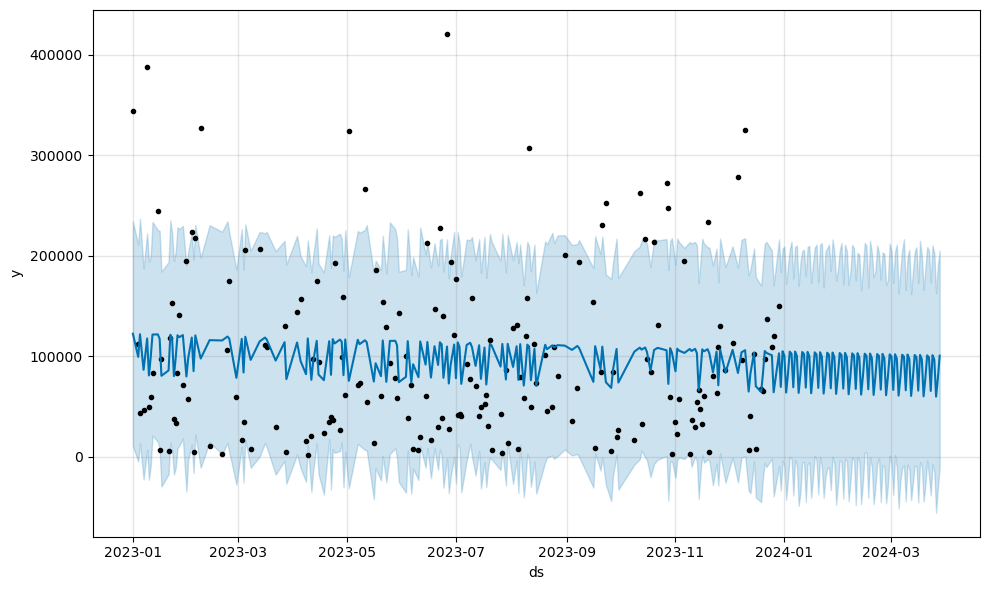

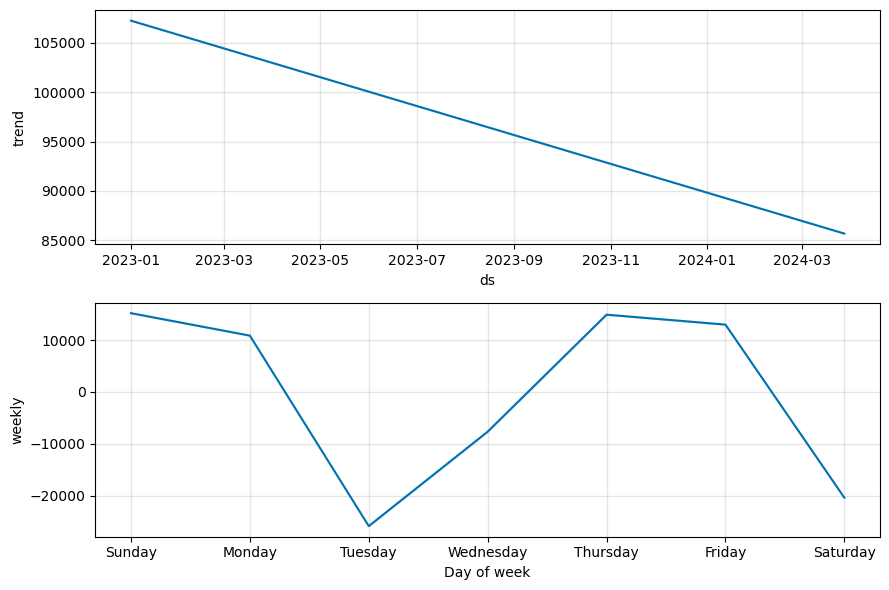

In [22]:
# train prophet model
model = Prophet()
model.fit(forecast_df)

# create future data and forecast
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# plot forecast
fig1 = model.plot(forecast)
st.pyplot(fig1)

# plot forecast components
fig2 = model.plot_components(forecast)
st.pyplot(fig2)